# PDS: Assignment 3
## For 10 points (not 5 points as usual)

### Deadline: June 1 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_3.ipynb (ex. Elon_Musk_1929_Assignment_3.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 2 points.

## ✤ *Importing needed libraries:*

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, Lasso , RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')

## Q1 (30%)
Use Credit.csv dataset. Do the following tasks:
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.
2. Using any model of your choice, predict Balance. To evaluate performance of the trained model, obtain MSE of training set, 5-fold CV, 10-fold CV, and test set. Present all results in the form of tables (dataframes).
3. Instead of using CV, using any random split obtain validation set of the same size as the test set. Train the model on training part, and evaluate performance of the trained model on training, validation and test sets. Present all results in the form of tables (dataframes).
4. Now, repeat the step above 5 times with 5 different random splits. You can save results in five different dataframes. 
5. Comment the results obtained using CV and validation sets.


*Note: You are allowed to use sklearn, but not statsmodels.*

*Hint: To get validation set, you can use train_test_split function two times (if you use it properly).*

In [ ]:
df1 = pd.read_csv('data/Credit.csv')
df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [ ]:
# ENCODING CATEGORICAL VALUES:
label_en = LabelEncoder()

df1['Gender'] = label_en.fit_transform(df1['Gender'].astype(str))
df1['Student'] = label_en.fit_transform(df1['Student'].astype(str))
df1['Married'] = label_en.fit_transform(df1['Married'].astype(str))
df1['Ethnicity'] = label_en.fit_transform(df1['Ethnicity'].astype(str))

df1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331


**From previous assignment, I know that these 4 columns are higly correlated with our Target Balance:**

In [ ]:
# STEP-1:
X = df1[['Rating','Limit','Income','Student']] # All highly correlated cols.
y = df1["Balance"] # Only this column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape)
print(X_test.shape)

(320, 4)
(80, 4)


In [ ]:
# STEP-2:
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# KNN:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluating on Train set
knn_pred_test1 = knn_model.predict(X_train)
tr_mse_knn1 = round(mean_squared_error(y_train, knn_pred_test1),3)
print('MSE on Train set>',tr_mse_knn1)

# Evaluating on Test set
knn_pred_test2 = knn_model.predict(X_test)
tst_mse_knn2 = round(mean_squared_error(y_test, knn_pred_test2),3)
print('MSE on Test set> ',tst_mse_knn2)

MSE on Train set> 24854.838
MSE on Test set>  21133.575


In [ ]:
# WHEN CV=5:

# Simple CV with cross_val_score:
scores_tr = abs(cross_val_score(knn_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
scores_ts = abs(cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_squared_error', cv=5))

mse_cv5_tr = np.mean(scores_tr)
mse_cv5_ts = np.mean(scores_ts)

print('MSE of 5-fold CV on Train Set : %.3f (%.3f)' % (mse_cv5_tr, np.std(scores_tr)))
print('MSE of 5-fold CV on Test Set:  %.3f (%.3f)' % (mse_cv5_ts, np.std(scores_ts)))

MSE of 5-fold CV on Train Set : 33499.478 (4663.877)
MSE of 5-fold CV on Test Set:  121329.700 (69407.137)


In [ ]:
# WHEN CV= 10:

# Simple CV with cross_val_score:
scores_tr = abs(cross_val_score(knn_model, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
scores_ts = abs(cross_val_score(knn_model, X_test, y_test, scoring='neg_mean_squared_error', cv=10))

mse_cv10_tr = np.mean(scores_tr)
mse_cv10_ts = np.mean(scores_ts)

print('MSE of 10-fold CV on Train Set : %.3f (%.3f)' % (mse_cv10_tr, np.std(scores_tr)))
print('MSE of 10-fold CV on Test Set:  %.3f (%.3f)' % (mse_cv10_ts, np.std(scores_ts)))

MSE of 10-fold CV on Train Set : 33768.641 (9765.518)
MSE of 10-fold CV on Test Set:  104325.650 (76084.924)


In [ ]:
# STEP-2:
# collecting RESULTS into 1 Dataframe
all_mse_knn = [tr_mse_knn1, mse_cv5_tr, mse_cv10_tr, tst_mse_knn2]
#columns:
columns_1 = {'MSE metric': all_mse_knn}

models_1=['Train data','5-fold CV', '10-fold CV', 'Test data']
result_1 = pd.DataFrame(data = columns_1, index = models_1)
result_1

,MSE metric
Train data,24854.838000
5-fold CV,33499.478125
10-fold CV,33768.640625
Test data,21133.575000


In [ ]:
# WHEN CV=10 (2nd way with GridSearchCV):

# knn_grid_10 = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)
# knn_grid_10.fit(X_train, y_train)
# knn_grid_10.best_params_, knn_grid_10.best_score_

# mse_cv10_tr = round(mean_squared_error(y_train,knn_grid_10.predict(X_train)),3)
# print('MSE of 10-fold CV on Train set>',mse_cv10_tr)

# mse_cv10_ts = round(mean_squared_error(y_test,knn_grid_10.predict(X_test)),3)
# print('MSE of 10-fold CV on Test set>',mse_cv10_ts)

### 3.Instead of using CV, using any random split obtain validation set of the same size as the test set. Train the model on training part, and evaluate performance of the trained model on training, validation and test sets. Present all results in the form of tables (dataframes).

In [ ]:
# STEP-3:
# By your hint, 2 times splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2021)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_val.shape)
print(y_val.shape)
# We can check that, Validation and Test size are SAME:

(240, 4)
(240,)
(80, 4)
(80,)
(80, 4)
(80,)


In [ ]:
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn = round(mean_squared_error(y_train, knn_model2.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn = round(mean_squared_error(y_val, knn_model2.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn = round(mean_squared_error(y_test, knn_model2.predict(X_test)),3)

In [ ]:
# STEP-3:
# collecting RESULTS into 1 Dataframe
all_mse3 = [trn_mse_knn, val_mse_knn, ts_mse_knn]
#columns:
columns_2 = {'MSE': all_mse3}

models_2=['Train Set','Validation Set', 'Test Set']
result_2 = pd.DataFrame(data = columns_2, index = models_2)
result_2

,MSE
Train Set,25308.479
Validation Set,55827.162
Test Set,39872.875


### 4.Now, repeat the step above 5 times with 5 different random splits. You can save results in five different plots.

In [ ]:
# 4.1. When Random_state = 0:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 0)
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

knn_model41 = KNeighborsClassifier()
knn_model41.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn41 = round(mean_squared_error(y_train, knn_model41.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn41 = round(mean_squared_error(y_val, knn_model41.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn41 = round(mean_squared_error(y_test, knn_model41.predict(X_test)),3)

In [ ]:
# 4.2. When Random_state = 42:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 42)
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

knn_model42 = KNeighborsClassifier()
knn_model42.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn42 = round(mean_squared_error(y_train, knn_model42.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn42 = round(mean_squared_error(y_val, knn_model42.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn42 = round(mean_squared_error(y_test, knn_model42.predict(X_test)),3)

In [ ]:
# 4.3. When Random_state = 123:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 123)
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

knn_model43 = KNeighborsClassifier()
knn_model43.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn43 = round(mean_squared_error(y_train, knn_model43.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn43 = round(mean_squared_error(y_val, knn_model43.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn43 = round(mean_squared_error(y_test, knn_model43.predict(X_test)),3)

In [ ]:
# 4.4. When Random_state = 1044:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1044)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 1044)
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

knn_model44 = KNeighborsClassifier()
knn_model44.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn44 = round(mean_squared_error(y_train, knn_model44.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn44 = round(mean_squared_error(y_val, knn_model44.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn44 = round(mean_squared_error(y_test, knn_model44.predict(X_test)),3)

In [ ]:
# 4.5. When Random_state = 2023:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 2023)
# Standartisation:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

knn_model45 = KNeighborsClassifier()
knn_model45.fit(X_train, y_train)

# Evaluating on Train set
trn_mse_knn45 = round(mean_squared_error(y_train, knn_model45.predict(X_train)),3)
# Evaluating on Validation set
val_mse_knn45 = round(mean_squared_error(y_val, knn_model45.predict(X_val)),3)
# Evaluating on Test set
ts_mse_knn45 = round(mean_squared_error(y_test, knn_model45.predict(X_test)),3)

In [ ]:
# STEP-4:
# Collecting ALL 5*3 RESULTS into 1 Dataframe
all_mse_1 = [trn_mse_knn41, val_mse_knn41, ts_mse_knn41]
all_mse_2 = [trn_mse_knn42, val_mse_knn42, ts_mse_knn42]
all_mse_3 = [trn_mse_knn43, val_mse_knn43, ts_mse_knn43]
all_mse_4 = [trn_mse_knn44, val_mse_knn44, ts_mse_knn44]
all_mse_5 = [trn_mse_knn45, val_mse_knn45, ts_mse_knn45]

#columns:
columns_5 = {'MSE_0': all_mse_1,'MSE_42': all_mse_2,'MSE_123': all_mse_3,'MSE_1044': all_mse_4,'MSE_2023': all_mse_5, }

models_5=['Train Set','Validation Set', 'Test Set']
result = pd.DataFrame(data = columns_5, index = models_5)
result
# IT is convenient, to collect all 5 results into 1 df:

,MSE_0,MSE_42,MSE_123,MSE_1044,MSE_2023
Train Set,19432.662,22239.317,23117.029,25263.550,29656.546
Validation Set,39039.088,54339.650,40680.588,23638.962,36835.875
Test Set,36748.875,29129.100,42944.238,30313.362,44829.212


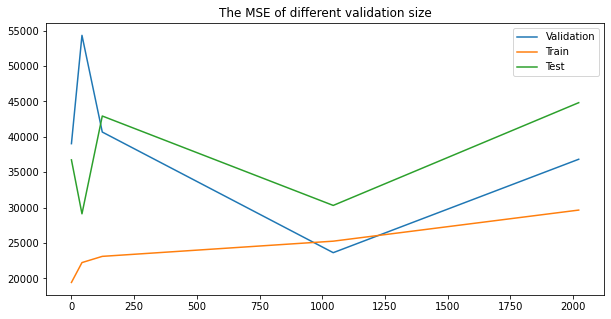

In [ ]:
# It is HAOS :)
# just for interest)

fig, ax = plt.subplots(figsize = (10,5));
rand_split = [0,42,123,1044,2023]
train_Set = [trn_mse_knn41,trn_mse_knn42,trn_mse_knn43,trn_mse_knn44,trn_mse_knn45]
valid_Set = [val_mse_knn41,val_mse_knn42,val_mse_knn43,val_mse_knn44,val_mse_knn45]
test_Set = [ts_mse_knn41, ts_mse_knn42, ts_mse_knn43, ts_mse_knn44, ts_mse_knn45]

sns.lineplot(x = rand_split,y = valid_Set);
sns.lineplot(x = rand_split,y = train_Set);
sns.lineplot(x = rand_split,y = test_Set);
ax.legend(['Validation','Train','Test']);
plt.title('The MSE of different Random state');

### 5.Comment the results:
+ I have used different random_states, such as 0, 42, 123, 1044, 2023.
+ To compare these Train MSEs, they are increasing along with Random_state increases.
+ To compare these Validation MSEs, it varies,increasing like up and down along with Random_state increases.
+ To compare these Test MSEs, it varies, decreasing like up and down along with Random_state increases.
+ 
+ If we compare, previous results of CV and these, train and test were smaller than these scores, meanwhile Validation score was 33 500+-.
+ MSE metric for Train (24854.83) and Test data(21133.5) is smaller for 10.000 than for 5-FOLD CV and 10-FOLD CV(33768.6).
+ 5-FOLD CV(33499) and 10-FOLD CV(33768.6) are very close to each other, both of them have about 33.500+ errors.
+ To summarise, it does not afect so much, whether we split into 5 or 10, scores will stay same.
+ Validation set MSE will always be different,it can be larger or smaller than both Train and test set scores.
**_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________**

## Q2 (20%)
Use boston.csv dataset. Do the following tasks: 
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.

2. Your task is to predict target variable - **medv**.

3. Use Ridge regression with alpha (penalty term) varying from 0 to some large value of alpha, at which all coefficients take value of 0. Using Cross-Validation select the most optimal value of alpha. 

4. For the selected value of alpha train your model on the training set (80%). And then evaluate on test set (20%). 

5. Show the coefficients of the final model.

*Note: You should use regular Ridge model from sklearn (not RidgeCV) and apply CV on it.*

In [ ]:
df2 = pd.read_csv('data/boston.csv')
df2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# STEP-1,2:
X = df2.drop("medv", axis = 1) # All columns except this column.
y = df2["medv"] # Only this column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
# STEP-3:
# Standartisation:
scalerr = preprocessing.StandardScaler().fit(X_train)
X_train = scalerr.transform(X_train)
X_test = scalerr.transform(X_test)

In [ ]:
from numpy import absolute
# creating Ridge and applying CV on it:
for cur_alpha in [0,1e-8, 1e-4, 1e-2, 1.0, 5.0, 10, 100, 1000]:
    lr_object =  Ridge(alpha=cur_alpha)
    scores = cross_val_score(lr_object, X_train, y_train, scoring='neg_mean_squared_error')
    print("Alpha: {0}\t  MSE_score: {1}\t  ".format(cur_alpha, absolute(np.mean(scores))))

Alpha: 0	  MSE_score: 23.52617792381188	  
Alpha: 1e-08	  MSE_score: 23.526177923555277	  
Alpha: 0.0001	  MSE_score: 23.526175357894722	  
Alpha: 0.01	  MSE_score: 23.525921791490894	  
Alpha: 1.0	  MSE_score: 23.504839951843085	  
Alpha: 5.0	  MSE_score: 23.482114571364164	  
Alpha: 10	  MSE_score: 23.5325099188337	  
Alpha: 100	  MSE_score: 26.171031426079452	  
Alpha: 1000	  MSE_score: 45.94956677886763	  


In [ ]:
# Let's also check very lARGE VALUE IS -> Infinity is approx= 10^308.9
ridge2 = Ridge(alpha=10^308,normalize = True)
ridge2.fit(X_train, y_train)
mean_squared_error(y_test, ridge2.predict(X_test))

62.7521807735111

In [ ]:
# We can check that, coefficients are close to ZERO:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

crim      -0.011293
zn         0.010907
indus     -0.014140
chas       0.006518
nox       -0.012617
rm         0.020944
age       -0.011019
dis        0.007234
rad       -0.010610
tax       -0.013567
ptratio   -0.014254
black      0.009482
lstat     -0.021947
dtype: float64

In [ ]:
# STEP-4:
# bY USING GridSearchCV, LET'S FIND optimal alpha:
ridge_reg = Ridge()
params_Ridge = {'alpha': [10^308, 10^10, 10 ,5, 1, 0.1, 0.01, 0.001, 0] , "fit_intercept": [True, False]}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 10, 'fit_intercept': True}

In [ ]:
Ridgeregression = Ridge(random_state=2021, **Ridge_GS.best_params_)
Ridgeregression.fit(X_train,y_train)
# Evaluating on TEST set:
ridge_mse = mean_squared_error(y_test, Ridgeregression.predict(X_test))
ridge_r2 = r2_score(y_test, Ridgeregression.predict(X_test))
print('MSE on test set>',ridge_mse)
print('R^2 on test set>',ridge_r2)

MSE on test set> 22.741891551537456
R^2 on test set> 0.6439698342538059


In [ ]:
# STEP-5:
# Cooefficients of Final model:
coef_r = Ridgeregression.coef_
ridge__coef_df = pd.Series(coef_r.flatten(), index=X.columns)
ridge__coef_df

crim      -0.981136
zn         1.101586
indus     -0.194378
chas       0.886919
nox       -1.852571
rm         2.806761
age        0.220966
dis       -2.954984
rad        2.329010
tax       -1.442409
ptratio   -1.834484
black      0.882823
lstat     -3.966553
dtype: float64

In [ ]:
# Next is RidgeCV Model:
ridgecv = RidgeCV(alphas=[ 1000000, 1000, 100, 10 ,5, 1, 0.1, 0.001, 0.0001], scoring='neg_mean_squared_error',normalize = True)
ridgecv.fit(X_train, y_train)

ridgecv_mse = mean_squared_error(y_test, ridgecv.predict(X_test))
ridgecv_r2 = r2_score(y_test, ridgecv.predict(X_test))
print('MSE on test set>',ridgecv_mse)
print('R^2 on test set>',ridgecv_r2)

alpha_rcv = ridgecv.alpha_
coef_rcv = ridgecv.coef_
print("Best model RidgeCV:\nalpha = {} \ncoefs = {}, ".format(alpha_rcv,coef_rcv ))

MSE on test set> 23.272493460899213
R^2 on test set> 0.6356631247917893
Best model RidgeCV:
alpha = 0.001 
coefs = [-1.06585695  1.25657127  0.01065574  0.86234798 -2.15042962  2.69827635
  0.30448434 -3.2497352   2.97058502 -2.00240365 -1.92532269  0.8826456
 -4.14823328], 


+ + My findings about Ridge Regression:
+ + MSE is small, which is  quite good -22.7 and R2_score is 64 %, medium score.
+ + Most of the Coefficients are closer to 0.

## Q3 (20%)
Again use boston.csv dataset. Do the following tasks: 
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.

2. Again, your task is to predict target variable - **medv**.

3. Use Lasso regression with alpha (penalty term) varying from 0 to some large value of alpha, at which all coefficients take value of 0. Using Cross-Validation select the most optimal value of alpha. 

4. For the selected value of alpha train your model on the training set (80%). And then evaluate on test set (20%). 

5. Show the coefficients of the final model.

6. Compare your results (i.e. test MSE) and coefficients with the Ridge Model.

*Note: In this case you should use LassoCV (not Lasso and apply CV separately).*

In [ ]:
df3 = pd.read_csv('data/boston.csv')
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# STEP-1:
X = df3.drop("medv", axis = 1) # All columns except this column.
y = df3["medv"] # Only this column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
# STEP-3:
# Standartisation:
scalerr = preprocessing.StandardScaler().fit(X_train)
X_train = scalerr.transform(X_train)
X_test = scalerr.transform(X_test)

In [ ]:
# creating Lasso and applying CV on it:
for cur_alpha in [0,1e-8, 1e-4, 1e-2, 1.0, 5.0, 10, 100, 1000]:
    lr_object =  Lasso(alpha=cur_alpha)
    scores = cross_val_score(lr_object, X_train, y_train, scoring='neg_mean_squared_error')
    print("Alpha: {0}\t  MSE_score: {1}\t  ".format(cur_alpha, absolute(np.mean(scores))))

Alpha: 0	  MSE_score: 23.526177923811883	  
Alpha: 1e-08	  MSE_score: 23.52617791474861	  
Alpha: 0.0001	  MSE_score: 23.526094946309428	  
Alpha: 0.01	  MSE_score: 23.525467442995712	  
Alpha: 1.0	  MSE_score: 30.578199468425005	  
Alpha: 5.0	  MSE_score: 62.95127946939759	  
Alpha: 10	  MSE_score: 90.24231532030356	  
Alpha: 100	  MSE_score: 90.24231532030356	  
Alpha: 1000	  MSE_score: 90.24231532030356	  


In [ ]:
# Let's also check very lARGE VALUE IS -> Infinity is approx= 10^308.9
lasso2 = Lasso(alpha=10^308,normalize = True)
lasso2.fit(X_train, y_train)
mean_squared_error(y_test, lasso2.predict(X_test))

63.88200110619682

In [ ]:
# We can check that, coefficients are close to ZERO:
pd.Series(lasso2.coef_.flatten(), index=X.columns)

crim      -0.0
zn         0.0
indus     -0.0
chas       0.0
nox       -0.0
rm         0.0
age       -0.0
dis        0.0
rad       -0.0
tax       -0.0
ptratio   -0.0
black      0.0
lstat     -0.0
dtype: float64

In [ ]:
# STEP-4:
# bY USING GridSearchCV, LET'S FIND optimal alpha:
Lasso_regr = Lasso()
params_lasso = {'alpha': [10^308, 10^10, 10 ,5, 1, 0.1, 0.01, 0.001, 0] , "fit_intercept": [True, False]}
Lasso_GS = GridSearchCV(Lasso_regr, param_grid=params_lasso, n_jobs=-1)
Lasso_GS.fit(X_train,y_train)
Lasso_GS.best_params_

{'alpha': 0.01, 'fit_intercept': True}

In [ ]:
Lasso_regr = Lasso(random_state=2021, **Lasso_GS.best_params_)
Lasso_regr.fit(X_train,y_train)
# Evaluating on TEST set:
lasso_mse = mean_squared_error(y_test, Lasso_regr.predict(X_test))
lasso_r2 = r2_score(y_test, Lasso_regr.predict(X_test))
print('MSE on test set>',lasso_mse)
print('R^2 on test set>',lasso_r2)

MSE on test set> 23.16830458557309
R^2 on test set> 0.6372942284520634


In [ ]:
# STEP-5:
# Cooefficients of Final model:
coef_l = Lasso_regr.coef_
lasso__coef_df = pd.Series(coef_l.flatten(), index=X.columns)
lasso__coef_df

crim      -1.041756
zn         1.224921
indus     -0.000000
chas       0.857835
nox       -2.099323
rm         2.716735
age        0.264834
dis       -3.214033
rad        2.862109
tax       -1.915206
ptratio   -1.910503
black      0.876360
lstat     -4.139578
dtype: float64

In [ ]:
# Next is RidgeCV Model:
lasso_cv = LassoCV(alphas=[ 1000000, 1000, 100, 10 ,5, 1, 0.1, 0.001, 0.0001], normalize = True)
lasso_cv.fit(X_train, y_train)

lasso_cv_mse = mean_squared_error(y_test, lasso_cv.predict(X_test))
lasso_cv_r2 = r2_score(y_test, lasso_cv.predict(X_test))
print('MSE on test set>',lasso_cv_mse)
print('R^2 on test set>',lasso_cv_r2)

alpha_lcv = lasso_cv.alpha_
coef_lcv = lasso_cv.coef_
print("Best model LassoCV:\nalpha = {} \ncoefs = {}, ".format(alpha_lcv,coef_lcv ))

MSE on test set> 23.27757436986749
R^2 on test set> 0.6355835818541221
Best model LassoCV:
alpha = 0.0001 
coefs = [-1.06497282e+00  1.25588725e+00  3.66487683e-03  8.60956466e-01
 -2.14795915e+00  2.69651428e+00  2.99912345e-01 -3.25686040e+00
  2.97198698e+00 -2.00182402e+00 -1.92449143e+00  8.81099172e-01
 -4.15219998e+00], 


In [ ]:
# STEP-:
# collecting RESULTS into 1 Dataframe
all_alph = ['10','0.001','0.01','0.0001']
all_mses = [ridge_mse, ridgecv_mse, lasso_mse, lasso_cv_mse ]
all_r2s =  [ridge_r2, ridgecv_r2, lasso_r2, lasso_cv_r2 ]
all_coef = [coef_r, coef_rcv, coef_l, coef_lcv]
#columns:
columns_lr = {'Alpha': all_alph, 'MSE': all_mses, 'R^2_score': all_r2s, 'Coefficients': all_coef}

models_lr = ['Ridge ','RidgeCV','Lasso ','LassoCV']
result_lr = pd.DataFrame(data = columns_lr, index = models_lr)
result_lr

,Alpha,MSE,R^2_score,Coefficients
Ridge,10,22.741892,0.643970,"[-0.9811360770771834, 1.101586412236099, -0.19..."
RidgeCV,0.001,23.272493,0.635663,"[-1.0658569525766879, 1.256571270683953, 0.010..."
Lasso,0.01,23.168305,0.637294,"[-1.0417564984168137, 1.2249210883347812, -0.0..."
LassoCV,0.0001,23.277574,0.635584,"[-1.064972822839501, 1.2558872547993372, 0.003..."


### My findings about Ridge, RidgeCV and Lasso, LassoCV Models:
+ Firstly, About Both models, when I was experimenting with small Alpha=0, mse is small, but when Alpha is very large(10^308)-infinity, MSE is also getting larger, meanwhile Coefficients are close to Zero, or even all of them are 0.

+ Secondly, I used GridSearch cross validation technique to find out the most Optimal and relevant Alpha for each model.And trained on them, to evaluate metrics MSE and R2_score.
+ In Ridge Regression , the penalty was 10, MSE (22.7) is enough small, and R2_score (64 %) is quite good.
+ In Lasso Regression , the penalty was 0.01, MSE(23.1) is enough small, and R2_score (64 %)  is same as in Ridge.
+ 
+ In Ridge CV , the penalty was 0.001, MSE (23.2) is enough small, and R2_score (63 %) is quite good.
+ In Lasso CV , the penalty was 0.0001, MSE(23.2) is enough small, and R2_score (63 %)  is same as in Ridgecv.
+ 
+ As a result, we can see that despite the fact that alpha was different, the scores for with CV and without CV are **very similar to each other.**
+ The coefficients varied from 0.0 till 4.0. But Lasso can show more absolute 0 coefficients(if we round them)
+ 
+ I think, I should have more practice, and searching additional informaton,cause it is interesting how alpha works. 

## Q4 (30%)
Use Wage.csv dataset. Do the following tasks:
1. Split your dataset to train and test sets (20% for testing) with random state equal to 2021. Imagine that you can use test set only for evaluation at the end.
2. Perform some data preprocessing.
3. Build Tree model to predict **wage** value. Set up parameters as you want or use default parameters. Evaluate the performance on test set.
4. Do the same but with Bagging.
5. Do the same but with Random Forest. 
6. Compare their resuts. Which model it is better to use. 
7. Now, for Random Forest model select the parameter that should be tuned and use CV to tune this parameter.
8. After selecting the parameter, run the model again. Show it's performance on test set. 

In [ ]:
df4 = pd.read_csv('data/Wage.csv')
df4.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [ ]:
# df4.describe(include='all')
# df4 = df4.rename(columns={'Unnamed: 0':'Id'})
df4 = df4.drop(['Unnamed: 0'], axis=1)

In [ ]:
# STEP-2. Preprocessing
# ENCODING CATEGORICAL VALUES:
label_en = LabelEncoder()

df4['sex'] = label_en.fit_transform(df4['sex'].astype(str))
df4['maritl'] = label_en.fit_transform(df4['maritl'].astype(str))
df4['race'] = label_en.fit_transform(df4['race'].astype(str))
df4['education'] = label_en.fit_transform(df4['education'].astype(str))
df4['region'] = label_en.fit_transform(df4['region'].astype(str))
df4['jobclass'] = label_en.fit_transform(df4['jobclass'].astype(str))
df4['health'] = label_en.fit_transform(df4['health'].astype(str))
df4['health_ins'] = label_en.fit_transform(df4['health_ins'].astype(str))

df4.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,0,0,0,0,0,0,0,1,4.318063,75.043154
1,2004,24,0,0,0,3,0,1,1,1,4.255273,70.476020
2,2003,45,0,1,0,2,0,0,0,0,4.875061,130.982177
3,2003,43,0,1,2,3,0,1,1,0,5.041393,154.685293
4,2005,50,0,3,0,1,0,1,0,0,4.318063,75.043154


**As we can see from here, 2 columns are have only 1 Unique Value, that's why I am dropping them**

In [ ]:
df4 = df4.drop(['sex'], axis=1)
df4 = df4.drop(['region'], axis=1)

# dropping logwage, because it has high correlation-95 %
df4 = df4.drop(['logwage'], axis=1)

### ✤ In order to check and see, which columns have higher Correlation value with Our Target column:

In [ ]:
# convert series to dataframe so it can be sorted
correlation = df4.corr()['wage']
correlation_df = pd.DataFrame(correlation)
# correct column label from Balance to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted

,Correlation
wage,1.000000
education,0.475775
jobclass,0.206897
age,0.195637
health,0.152337
maritl,0.067360
year,0.065544
race,-0.026865
health_ins,-0.308310


In [ ]:
# STEP-1:
X = df4[['education','jobclass','age']] # All columns except this column.
y = df4["wage"] # Only this column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

print(X_train.shape)
print(X_test.shape)

(2400, 3)
(600, 3)


In [ ]:
# Standardizing data:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# STEP-3:
df4_dec_tree = DecisionTreeRegressor()
df4_dec_tree.fit(X_train, y_train)

# Evaluating on Test set
dt_pred_test1 = df4_dec_tree.predict(X_test)

mse_decr = round(mean_squared_error(y_test,dt_pred_test1),3)
r2_decr = round(r2_score(y_test,dt_pred_test1),3)
print('MSE on test set>',mse_decr)
print('R^2 on test set>',r2_decr)

MSE on test set> 1339.255
R^2 on test set> 0.105


In [ ]:
# STEP-4:
df4_bagg = BaggingRegressor()
df4_bagg.fit(X_train, y_train)

# Evaluating on Test set
dt_pred_test2 = df4_bagg.predict(X_test)

mse_bagr = round(mean_squared_error(y_test,dt_pred_test2),3)
r2_bagr = round(r2_score(y_test,dt_pred_test2),3)
print('MSE on test set>',mse_bagr)
print('R^2 on test set>',r2_bagr)

MSE on test set> 1318.199
R^2 on test set> 0.119


In [ ]:
# STEP-5:
df4_rand_for = RandomForestRegressor()
df4_rand_for.fit(X_train, y_train)

# Evaluating on Test set
dt_pred_test3 = df4_rand_for.predict(X_test)

mse_rfr = round(mean_squared_error(y_test,dt_pred_test3),3)
r2_rfr = round(r2_score(y_test,dt_pred_test3),3)
print('MSE on test set>',mse_rfr)
print('R^2 on test set>',r2_rfr)

MSE on test set> 1275.81
R^2 on test set> 0.148


In [ ]:
# STEP-6:
# collecting into 1 Dataframe
all_mse = [mse_decr,mse_bagr,mse_rfr]
all_r2 = [r2_decr,r2_bagr,r2_rfr]
#columns:
columns = {'MSE': all_mse, 'R^2_score': all_r2}

models=['Decision Tree Regressor','Bagging Regressor','Random Forest Regressor']
result = pd.DataFrame(data = columns,index = models)
result

,MSE,R^2_score
Decision Tree Regressor,1339.255,0.105
Bagging Regressor,1318.199,0.119
Random Forest Regressor,1275.810,0.148


### My finding about  above 3 Models:
+ As it is regression problem, I decided to use regression Models and Metrics.
+ Here, I used 2 metrics such as MSE and R2_score to evaluate all 3 models, and find out which one is better.
+ As we know, MSE value is mean_error_square, so it would be better if it is much lower, here is almost huge values-1200-1300.
+ And R2_score is too low, because it varies from 0 to 1, it is too close to 0.15. It means that it has poor fit modelling.
+ In conclusion, Despite the fact, that all of them has closer values variations,
+ I want to say that, RandomForest Regressor model shows better results than others.
+ Because, it minimizes overfitting, and it tends to be more accurate.

In [ ]:
# STEP-7:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [5, 10]}


In [ ]:
# Random search of parameters, using cross validation, 
rf_random = RandomizedSearchCV( estimator=df4_rand_for,param_distributions = random_grid,n_iter = 10,cv = 10,verbose=2,random_state=42,n_jobs = -1,scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
# best combination of parameters of random search
rf_random.best_params_
#rf_random.best_estimator_

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
# predicting on 
random_best= rf_random.best_estimator_.predict(X_train)
# MSE:
random_mse = round(mean_squared_error(y_train, random_best), 2)
print('The best model for Train-- MSE', random_mse)
# R2_score:
random_r2 = round(r2_score(y_train, random_best), 2)
print('The best model for Train-- R^2', random_r2)

The best model for Train-- MSE 1084.48
The best model for Train-- R^2 0.4


In [ ]:
# predicting on 
random_best= rf_random.best_estimator_.predict(X_test)
# MSE:
random_mse = round(mean_squared_error(y_test, random_best), 2)
print('The best model for Test-- MSE', random_mse)
# R2_score:
random_r2 = round(r2_score(y_test, random_best), 2)
print('The best model for Test-- R^2', random_r2)

The best model for Test-- MSE 1120.12
The best model for Test-- R^2 0.25


+ I used Randomised Seacch CV to find best parameter in order to upgrade the Model's Predicting Scores.
+ Used params: {'n_estimators': 200, 'min_samples_split': 10,'max_depth': 10}
+ R^2 changed from 0.15 till 0.25, it is same low, but increased a little bit, which is good.
+ MSE changed from 1267 till 1120, it is better, it means that errors rate is decreased.
+ By the help of tunning parameters, R^2 and MSE scores have changed a little bit for better Results.
+ 
+ In conclusion, it is more convenient, when we can choose preferrabe parameters, and regulate them, as we want, in order to achieve the best results and upgrade our Model.

---

### Evaluation

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   30/30    |     
| 2       |   20/20   | 
| 3       |   20/20   |     
| 4       |   30/30   | 
|**Total**|**100/100**  | 
